# House Price Prediction

Predicting the any house price from the given features selected to be used in the algorithm.

In [377]:
import numpy as np
import pandas as pd
import matplotlib as mp
import seaborn as sns

#### 1- Data Analysis:


In [378]:
data = pd.read_csv("kc_house_data.csv", delimiter=",")
new_data = pd.DataFrame.copy(data)

new_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [379]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [380]:
new_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [381]:
new_data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [382]:
# Function to Plot correlation graph for a given data
def dataCorr(data):
    data_corr = data.corr()
    mask = np.zeros_like(data_corr)
    mask[np.triu_indices_from(mask)] = True
    mp.pyplot.subplots(figsize=(15, 15))
    dataplot = sns.heatmap(data_corr, mask=mask, annot=True, cmap="coolwarm", center=0, square=True, fmt=".2f")
    mp.pyplot.xticks(rotation = 45)
    mp.pyplot.yticks(rotation = 30)
    mp.pyplot.show()

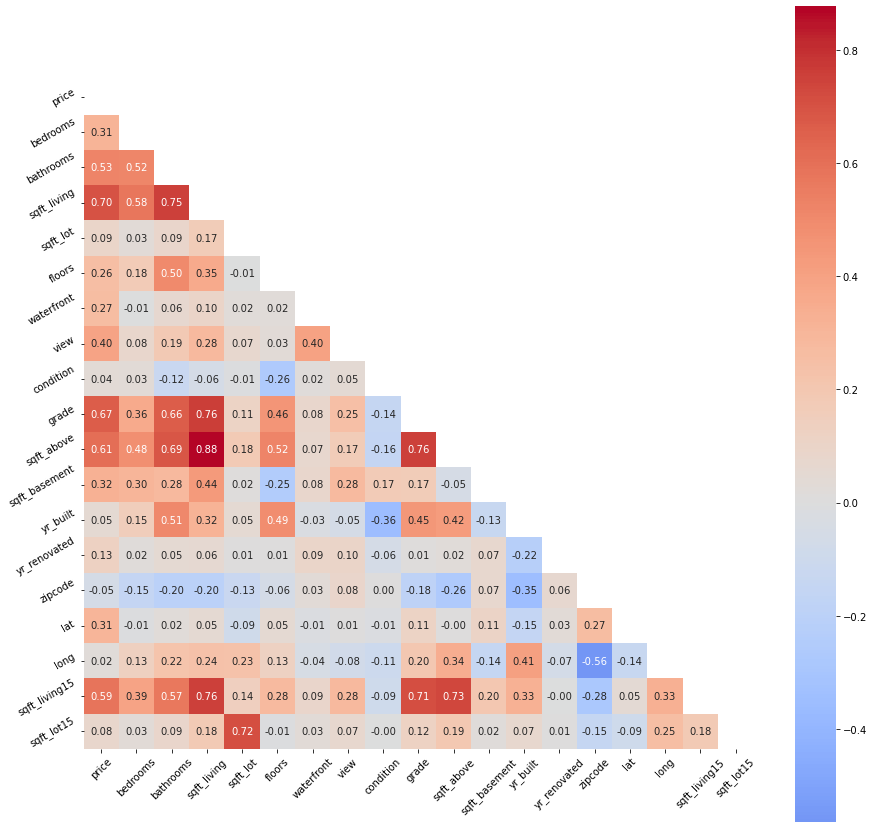

In [383]:
# temp = new_data.drop(columns=["date", "id"], axis=1)
dataCorr(new_data.drop("id", axis=1))
# temp.head()

##### Finding outliers:
- Finding the rows that are considered outliers and removing them from the dataset we have

In [384]:
from collections import Counter


def dataOutliers(data, n, features):
    rows = []
    for col in features:
        Q1 = np.percentile(data[col], 25)
        Q3 = np.percentile(data[col], 75)
        IQR = Q3 - Q1
        outlierStep = IQR * 1.5
        outlierList = data[(data[col] < Q1 - outlierStep) | (data[col] > Q3 + outlierStep)].index
        rows.extend(outlierList)
    outlier_rows = Counter(rows)
    multipleOutliers = list(key for key, value in outlier_rows.items() if value > n)
    return multipleOutliers
outliers_to_drop = dataOutliers(new_data, 2, ["bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors", "waterfront", "view", "condition", "grade", "sqft_above", "sqft_basement", "lat", "sqft_living15", "sqft_lot15"])
print(f"Number of outlier rows is: {len(outliers_to_drop)}")
# print(f"Number of outlier rows is: {len(outliers_to_drop)}\nList of outliers are: {outliers_to_drop}")

Number of outlier rows is: 1407


In [385]:
print(f"Data before removing outliers = {len(new_data)} rows")
new_data = new_data.drop(outliers_to_drop, axis=0).reset_index(drop=True)
print(f"Data after removing outliers = {len(new_data)} rows")

Data before removing outliers = 21613 rows
Data after removing outliers = 20206 rows


##### Data Correlation after removing outliers:

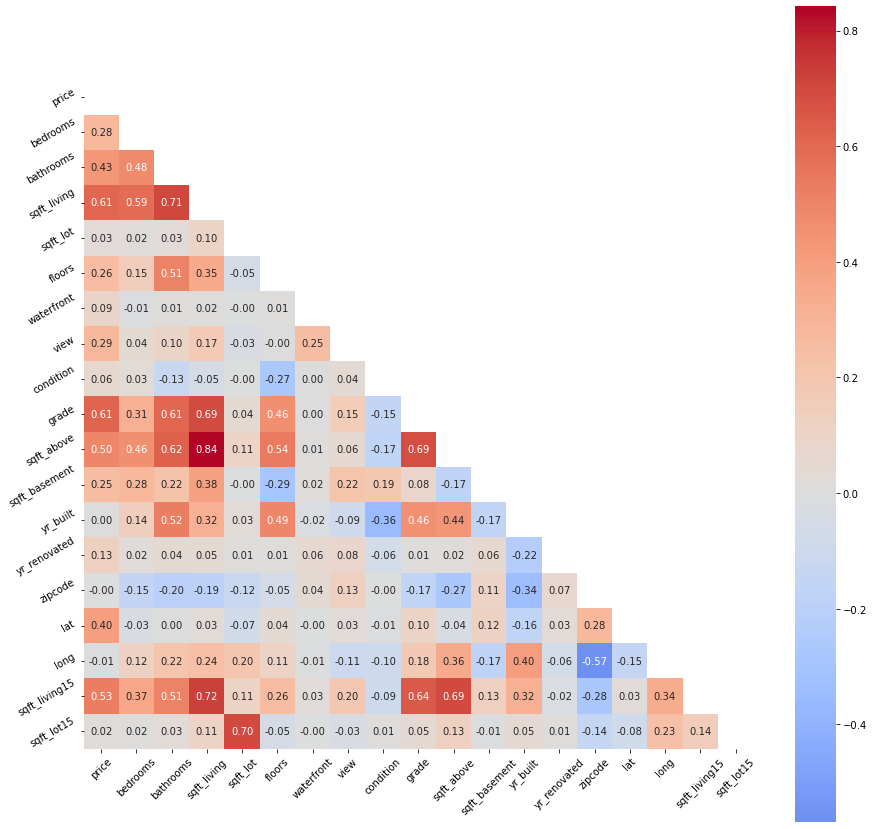

In [386]:
dataCorr(new_data.drop("id", axis=1))

#### 2- Data Visualisation:

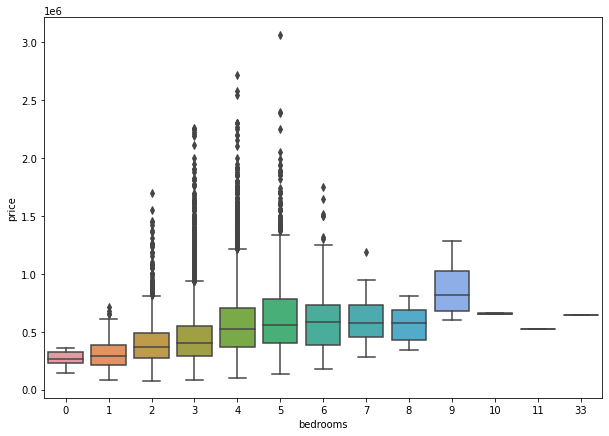

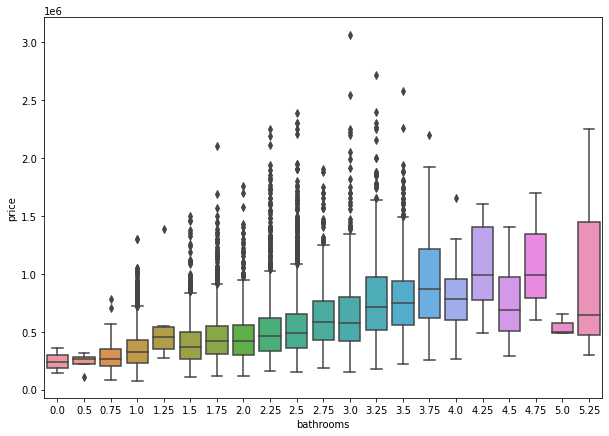

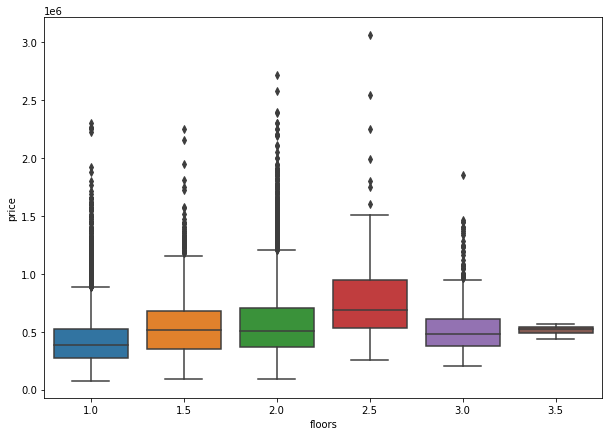

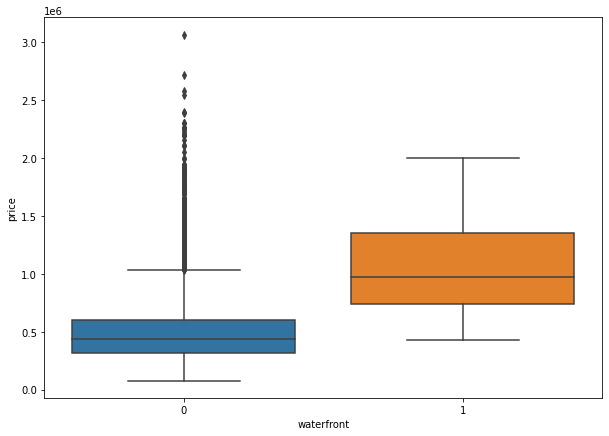

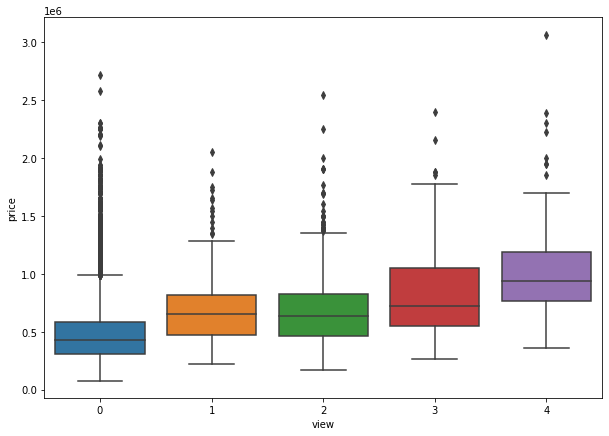

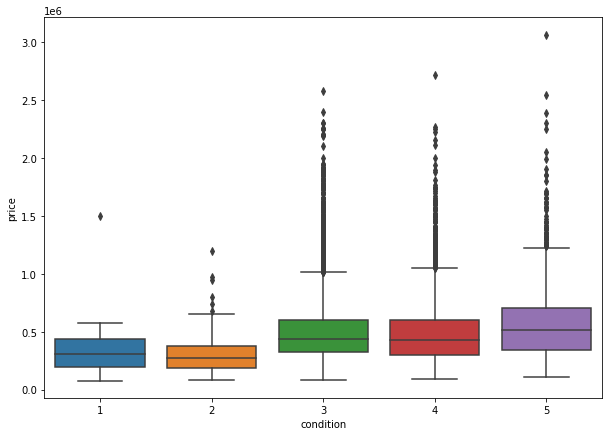

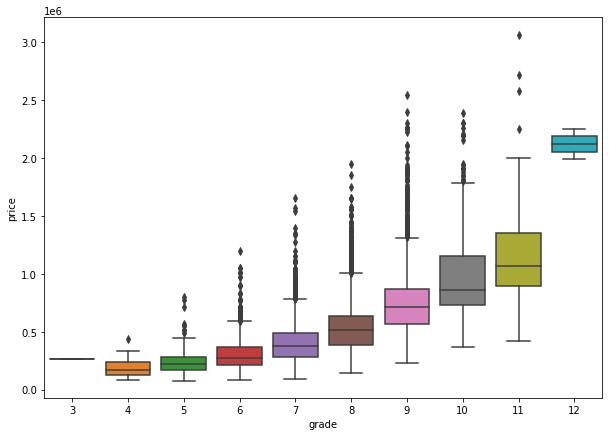

In [387]:
def boxPlot(data, features, yaxis):
    for col in features:
        mp.pyplot.subplots(figsize=(10,7))
        sns.boxplot(data=data, x = col, y = yaxis)
        mp.pyplot.show()
    
boxPlot(new_data, ["bedrooms", "bathrooms", "floors", "waterfront", "view", "condition", "grade"], "price")

##### Grade, Condition and Price relationships:

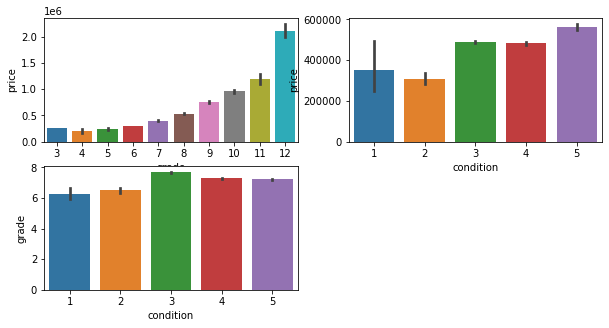

In [388]:
mp.pyplot.subplots(figsize=(10, 5))
mp.pyplot.subplot(2, 2, 1)
sns.barplot(data=new_data, x="grade", y="price")
mp.pyplot.subplot(2, 2, 2)
sns.barplot(data=new_data, x="condition", y="price")
mp.pyplot.subplot(2, 2, 3)
sns.barplot(data=new_data, x="condition", y="grade")
mp.pyplot.show()


- condition(1 --> 5) and grade(1 --> 13) could be combined together into new variable called quality with the value more biased towards grade eg: (grade*2 + condition*1.5)

In [389]:
new_data["quality"] = new_data["grade"]*2 + new_data["condition"]*1.5

new_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,quality
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,18.5
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,18.5
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,16.5
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,21.5
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,20.5


In [390]:
def Normalisation(data, max):
    norm = ((data - data.min())/(data.max() - data.min())) * max
    return round(norm)

- Then we can normalise it between (0 --> 5) and round it to the nearest full number

In [391]:
new_data["quality"] = Normalisation(new_data["quality"], 5)

new_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,quality
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2.0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2.0
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,1.0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,3.0
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2.0


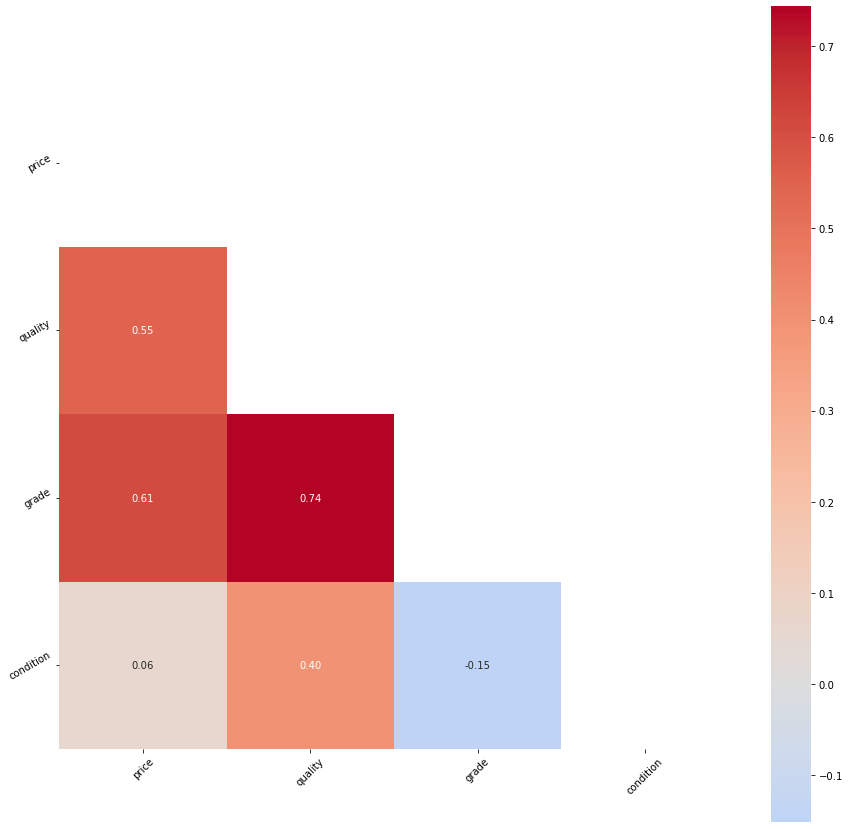

In [392]:
dataCorr(new_data[["price", "quality", "grade", "condition"]])

In [393]:
new_data.drop(["condition", "grade"], axis=1, inplace=True)

<AxesSubplot:xlabel='quality', ylabel='price'>

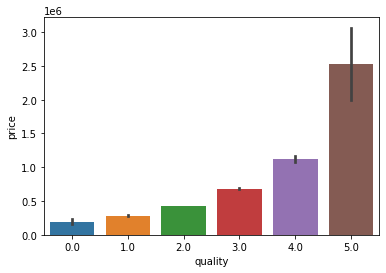

In [394]:
sns.barplot(data=new_data, x="quality", y="price")

In [395]:
new_data[["quality", "price"]].groupby("quality", as_index=False).mean().sort_values(by = "price", ascending=False)

,quality,price
5,5.0,2.527500e+06
4,4.0,1.120552e+06
3,3.0,6.797267e+05
2,2.0,4.241116e+05
1,1.0,2.853610e+05
0,0.0,1.910938e+05


##### sqft_living, sqft_living15, sqft_above and Price relationships:

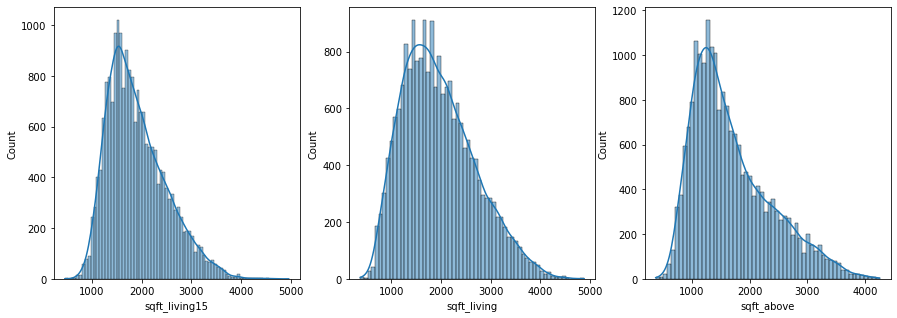

In [396]:
mp.pyplot.subplots(figsize=(15, 5))
mp.pyplot.subplot(1, 3, 1)
sns.histplot(data=new_data, x="sqft_living15", kde=True)
mp.pyplot.subplot(1, 3, 2)
sns.histplot(data=new_data, x="sqft_living", kde=True)
mp.pyplot.subplot(1, 3, 3)
sns.histplot(data=new_data, x="sqft_above", kde=True)
mp.pyplot.show()


In [397]:
a1 = new_data["sqft_living"].mean()
a2 = new_data["sqft_living15"].mean()
a3 = (new_data["sqft_above"] + new_data["sqft_basement"]).mean()

print(f"Average for sqft_living: {a1}\nAverage for sqft_living15: {a2}\nAverage for sqft_above + sqft_basement: {a3}")

Average for sqft_living: 1955.6852420073246
Average for sqft_living15: 1905.5606750470158
Average for sqft_above + sqft_basement: 1955.6852420073246


- Since sqft_living is equal to sqft_above + sqft_basement, there will be no need having the same feature twice. Therefore, I'll take the sqft_living and take the average between it and sqft_living15

In [398]:
new_data["avg_sqft_living"] = (new_data["sqft_living15"] + new_data["sqft_living"])/2


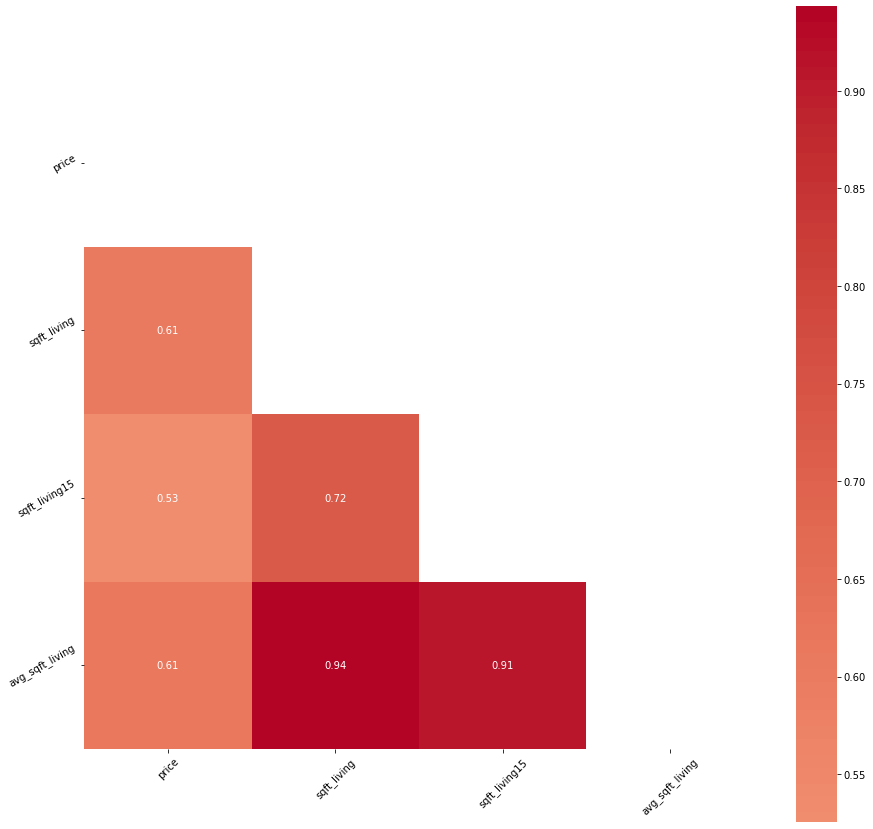

In [399]:
dataCorr(new_data[["price", "sqft_living", "sqft_living15", "avg_sqft_living"]])

- Looking at the correlation after creating a new feature called avg_sqft_living, it was a good idea to use the average of these two features into a new one and removing them to remove any extra columns

In [400]:
new_data.drop(["sqft_living", "sqft_living15"], axis=1, inplace=True)